In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class teacher:
    def __init__(self, N):
        self._w    = np.random.uniform(-1,1,N+1)
        self._w[0] =0.
        self._w   /= np.linalg.norm(self._w)
        self._N = N

    def generate_sample(self, M, c=0):
        self._w[0] = c
        sample = [np.random.randn(self._N+1) for i in range(M)]
        for s in sample:
            s[0]=1.
        labels = np.sign(np.dot(sample,self._w,))
        return sample, labels

In [3]:
def cycle(iterable, t=0):
    """
        Like cycle in itertools, but it works only with iterable object.
        NOT ITERATORS.
    """
    if t!=0:
        i = 0
        while True:
            if i>=t:
                break
            for elem in iterable:
                if i>=t:
                    break
                i+=1
                yield elem
    else:
        while True:
            for elem in iterable:
                yield elem

In [4]:
class perceptron:
    def __init__(self,N):
        self._w    = np.random.uniform(-1,1,N+1)
        self._w[0] = 0.
        self._w   /= np.linalg.norm(self._w)
        self._k = 0.0

    def train(self, data, labels, eta=0.1, T=0, keeptrack=False):
        history_E = []
        history_w = []
        for i in cycle(list(range(len(data))),T):
            xi = data[i]*labels[i]
            if np.dot(self._w,xi)<self._k:
                self._w += eta*xi
                self._w /= np.linalg.norm(self._w[1:])
                if T==0:
                    err = self.error(data,labels)
                    if keeptrack:
                        history_E.append(err)
                        history_w.append(self._w)
                    if err==0.:
                        break
                elif keeptrack:
                    history_E.append(self.error(data,labels))
                    history_w.append(self._w)
        if keeptrack:
            return history_E, history_w
    
    def error(self, data, labels):
        fx = np.sign(np.dot(data,self._w))
        err = np.sum(fx!=labels)/len(data)
        return err
    
    def output(self, data):
        return np.sign(np.dot(data,self._w))

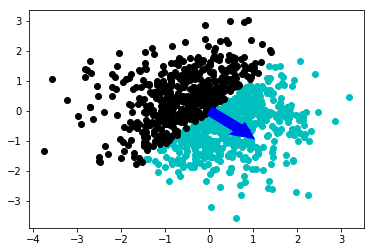

In [53]:
t = teacher(2)
train_x, train_y = t.generate_sample(1000)

ax = plt.subplot(111)
[plt.plot(*x[1:],"co") for x,y in zip(train_x,train_y) if y==1]
[plt.plot(*x[1:],"ko") for x,y in zip(train_x,train_y) if y==-1]
ax.arrow(0, 0, t._w[1],t._w[2], linewidth=10,
         head_width=0.1, head_length=0.1, fc='b', ec='b',zorder=9)
plt.show()

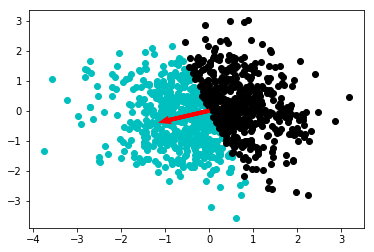

In [54]:
s = perceptron(2)
output = s.output(train_x)

ax = plt.subplot(111)
[plt.plot(*x[1:],"co") for x,y in zip(train_x,output) if y==1]
[plt.plot(*x[1:],"ko") for x,y in zip(train_x,output) if y==-1]
ax.arrow(0, 0, s._w[1],s._w[2], linewidth=4,
         head_width=0.1, head_length=0.1, fc='r', ec='r',zorder=10)
plt.show()

In [55]:
err, w = s.train(train_x, train_y, eta=0.01, T=10000, keeptrack=True)

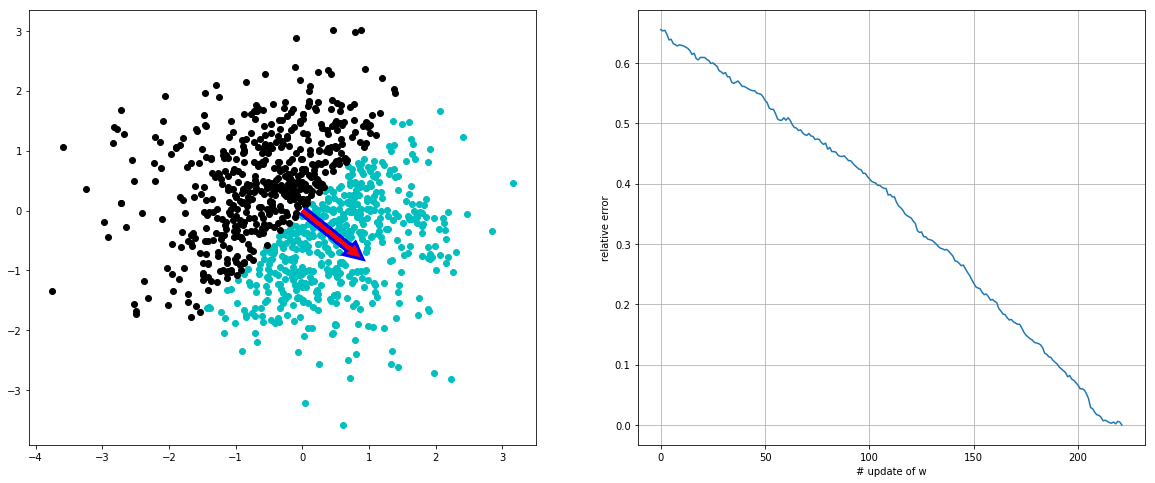

In [58]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(121)
[ax.plot(*x[1:],"co") for x,y in zip(train_x,train_y) if y==1]
[ax.plot(*x[1:],"ko") for x,y in zip(train_x,train_y) if y==-1]
ax.arrow(0, 0, w[-1][1],w[-1][2], linewidth=4,
         head_width=0.1, head_length=0.1, fc='r', ec='r',zorder=10)
ax.arrow(0, 0, t._w[1],t._w[2], linewidth=10,
         head_width=0.1, head_length=0.1, fc='b', ec='b',zorder=9)
ax_err = plt.subplot(122)
plt.grid()
ax_err.set_xlabel("# update of w")
ax_err.set_ylabel("relative error")
plt.plot(err)
plt.show()

In [15]:
val_x, val_y = t.generate_sample(200)
s.error(val_x,val_y)

0.0

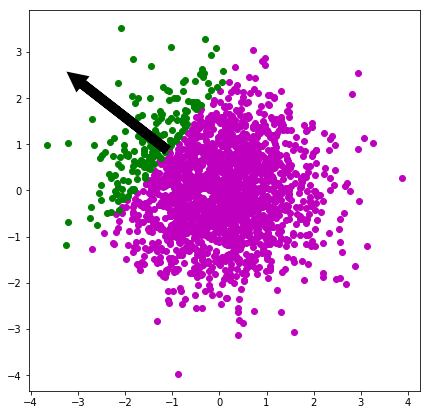

In [70]:
t = teacher(2)
train_x, train_y = t.generate_sample(2000, 1.4)

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
[plt.plot(*x[1:],"mo") for x,y in zip(train_x,train_y) if y==1]
[plt.plot(*x[1:],"go") for x,y in zip(train_x,train_y) if y==-1]
ax.arrow(-t._w[0]*t._w[1],-t._w[0]*t._w[2],
         -(1+t._w[0])*t._w[1],-(1+t._w[0])*t._w[2],
         linewidth=10, head_width=0.1, head_length=0.1, fc='k', ec='k',zorder=9)
plt.show()

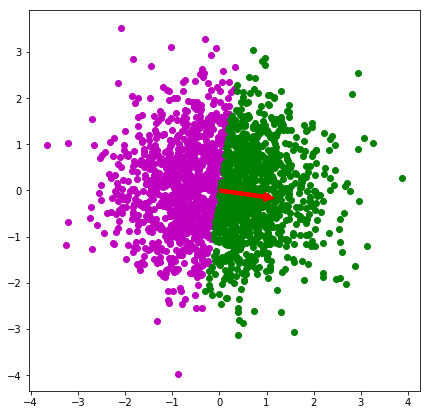

In [71]:
s = perceptron(2)
output = s.output(train_x)

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
[plt.plot(*x[1:],"mo") for x,y in zip(train_x,output) if y==1]
[plt.plot(*x[1:],"go") for x,y in zip(train_x,output) if y==-1]
ax.arrow(-s._w[0]*s._w[1],-s._w[0]*s._w[2],
         -(1+s._w[0])*s._w[1],-(1+s._w[0])*s._w[2],
         linewidth=4, head_width=0.1, head_length=0.1, fc='r', ec='r',zorder=9)
plt.show()

In [72]:
err, w = s.train(train_x, train_y, eta=0.01, T=10000, keeptrack=True)

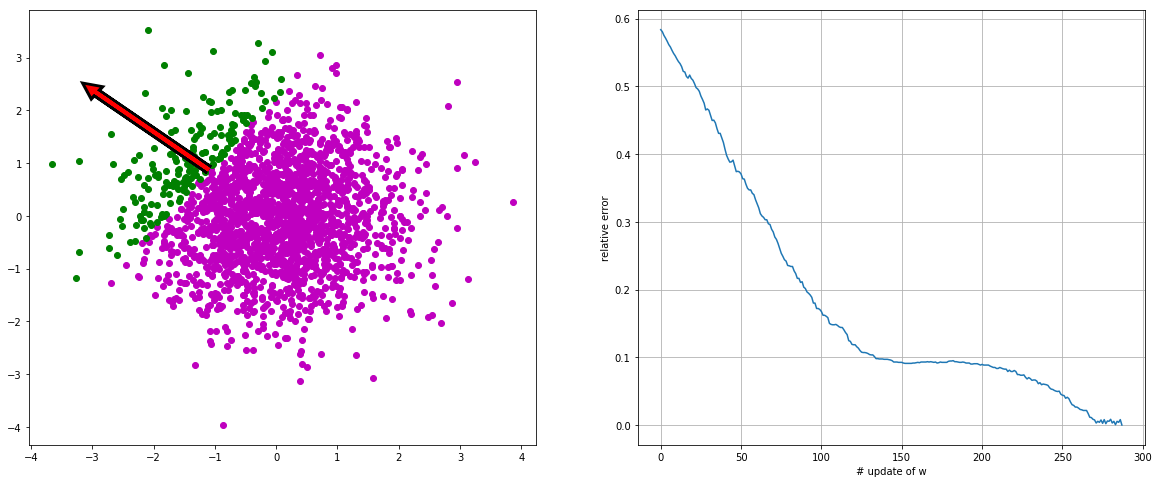

In [78]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(121)
[ax.plot(*x[1:],"mo") for x,y in zip(train_x,train_y) if y==1]
[ax.plot(*x[1:],"go") for x,y in zip(train_x,train_y) if y==-1]
ax.arrow(-w[-1][0]*w[-1][1],-w[-1][0]*w[-1][2],
         -(1+w[-1][0])*w[-1][1],-(1+w[-1][0])*w[-1][2],
         linewidth=4, head_width=0.1, head_length=0.1, fc='r', ec='r',zorder=10)
ax.arrow(-t._w[0]*t._w[1],-t._w[0]*t._w[2],
         -(1+t._w[0])*t._w[1],-(1+t._w[0])*t._w[2],
         linewidth=10, head_width=0.1, head_length=0.1, fc='k', ec='k',zorder=9)
ax_err = plt.subplot(122)
plt.grid()
ax_err.set_xlabel("# update of w")
ax_err.set_ylabel("relative error")
plt.plot(err)
plt.show()

In [77]:
val_x, val_y = t.generate_sample(500,1.4)
s.error(val_x,val_y)

0.0

## MNIST

In [30]:
from collections import defaultdict
from mnist import MNIST
mnstdata = MNIST("../python-mnist/data/")
mnstdata.load_training()
mnstdata.load_testing()

train_x = np.array([[1]+i for i in mnstdata.train_images],dtype=np.float)
train_x[1:] /= 256
val_x = np.array([[1]+i for i in mnstdata.test_images],dtype=np.float)
val_x[1:] /= 256
def label_n(N, val_or_train="train"):
    if val_or_train=="train":
        train_y = [x==N and 1 or -1 for x in mnstdata.train_labels]
        train_y = np.array(train_y)
        return train_y
    elif val_or_train=="val":
        val_y = [x==N and 1 or -1 for x in mnstdata.test_labels]
        val_y = np.array(val_y)
        return val_y



In [32]:
class Perceptron(perceptron):
    def train(self, data, labels, eta=0.01, T=0):
        err = self.error(data,labels)
        yield err
        for i in cycle(list(range(len(data))),T):
            xi = data[i]*labels[i]
            if np.dot(self._w,xi)<self._k:
                self._w += eta*xi
                self._w /= np.linalg.norm(self._w[1:])
                err = self.error(data,labels)
                yield err
                if err==0.:
                    break

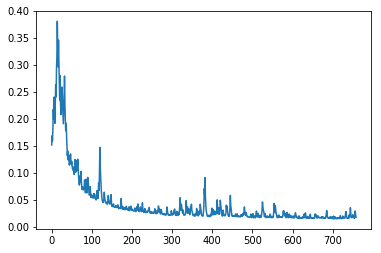

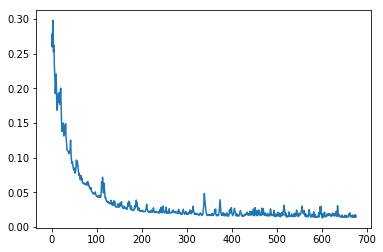

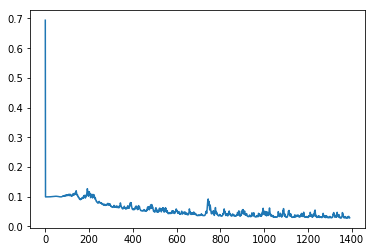

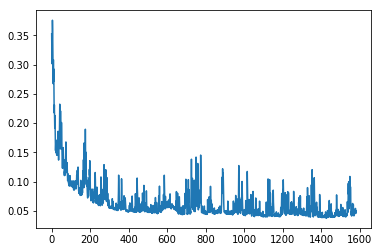

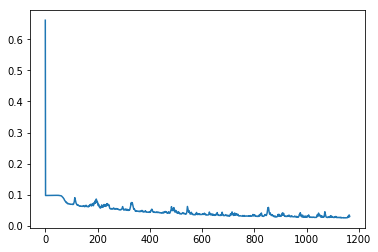

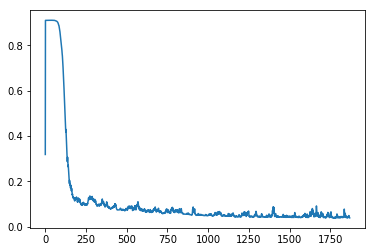

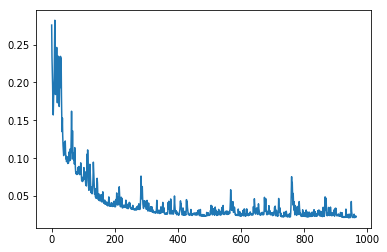

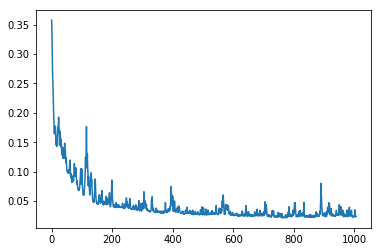

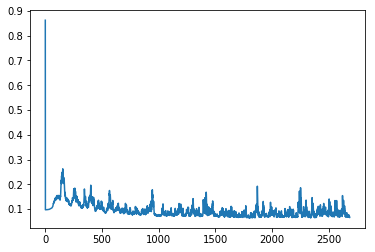

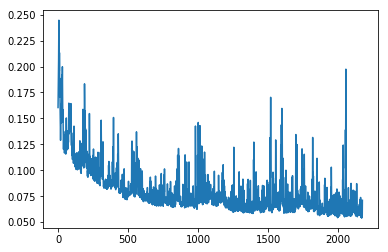

In [34]:
s = [Perceptron(784) for i in range(10)]
for i in range(10):
    train_y = label_n(i)
    err = [i for i in s[i].train(train_x, train_y, eta=0.001, T=30000)]
    s[i].error(train_x, train_y)
    plt.plot(err)
    plt.show()

In [35]:
for i in range(10):
    val_y = label_n(0, val_or_train="val")
    print(s[i].error(val_x,val_y))

0.0164
0.2058
0.1919
0.2009
0.209
0.1684
0.1902
0.1898
0.168
0.2378


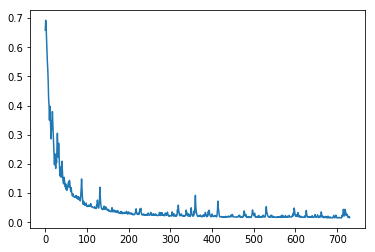

0.014200000000000001